In [ ]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#load Dataset:
df=pd.read_csv('/content/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#overview:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Data Cleaning
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')  # Safe drop


In [ ]:
#Covert type:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [ ]:
#Summary Statistics:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
         PassengerId    Survived  Pclass                 Name   Sex  \
count    891.000000  891.000000   891.0                  891   891   
unique          NaN         NaN     3.0                  891     2   
top             NaN         NaN     3.0  Dooley, Mr. Patrick  male   
freq            NaN         NaN   491.0                    1   577   
mean     446.000000    0.383838     NaN                  NaN   NaN   
std      257.353842    0.486592     NaN                  NaN   NaN   
min        1.000000    0.000000     NaN                  NaN   NaN   
25%      223.500000    0.000000     NaN                  NaN   NaN   
50%      446.000000    0.000000     NaN                  NaN   NaN   
75%      668.500000    1.000000     NaN                  NaN   NaN   
max      891.000000    1.000000     NaN                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   891.000000  891.000000  891.000000     891  891.000000 

In [ ]:
#Group Based Insight:
print("\nSurvival by Gender:\n", df.groupby('Sex')['Survived'].value_counts(normalize=True))
print("\nSurvival by Class:\n", df.groupby('Pclass')['Survived'].value_counts(normalize=True))


Survival by Gender:
 Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

Survival by Class:
 Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


/tmp/ipython-input-267952068.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Gender:\n", df.groupby('Sex')['Survived'].value_counts(normalize=True))
/tmp/ipython-input-267952068.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Class:\n", df.groupby('Pclass')['Survived'].value_counts(normalize=True))


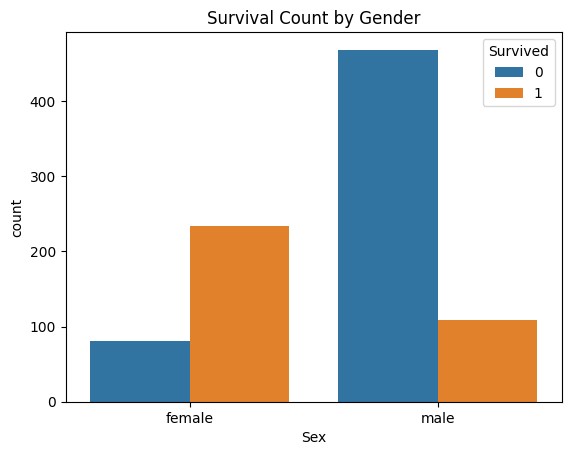

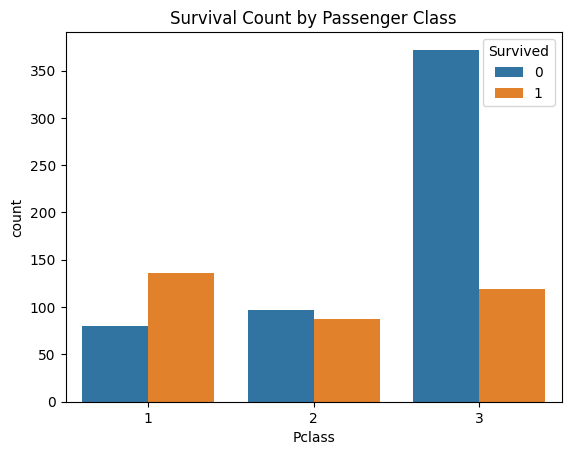

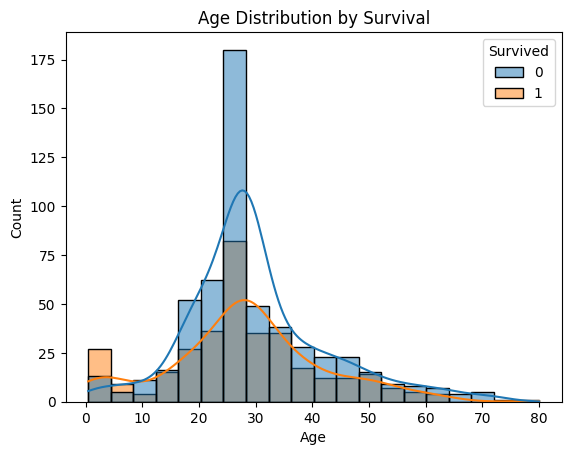

In [ ]:
#Data Visulization:
# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.show()

# Survival by class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', bins=20, hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

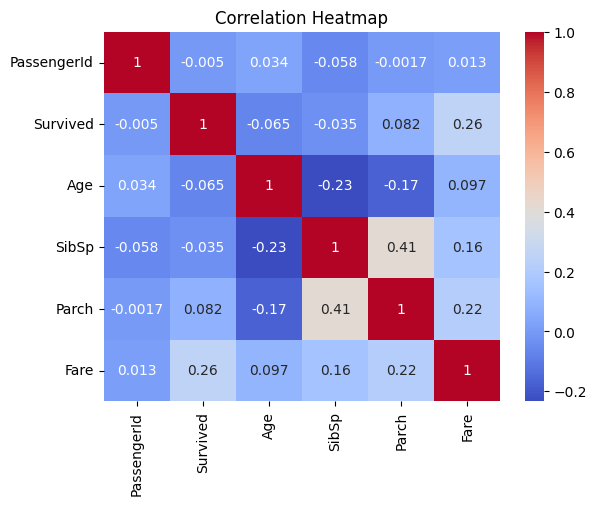

In [ ]:
#Bonus:Heat map of correlation:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
